## SHREE KRISHNA KANTH S
## 225229136
## II MSc DA A

In [1]:
import librosa
import os
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Function to extract STFT features from audio
def extract_stft_features(audio_path, n_fft=2048, hop_length=512):
    y, sr = librosa.load(audio_path, sr=None)
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    return stft

# Directory paths
ping_dir = r'D:\3 Sem\PDL\ping pong\ping'
pong_dir = r'D:\3 Sem\PDL\ping pong\pong'

# Lists to store STFT features
ping_stft_features = []
pong_stft_features = []

In [3]:
# Process ping audio files
for filename in os.listdir(ping_dir):
    if filename.endswith(".mp3"):
        audio_path = os.path.join(ping_dir, filename)
        stft = extract_stft_features(audio_path)
        ping_stft_features.append(stft)

# Process pong audio files
for filename in os.listdir(pong_dir):
    if filename.endswith(".mp3"):
        audio_path = os.path.join(pong_dir, filename)
        stft = extract_stft_features(audio_path)
        pong_stft_features.append(stft)

# Determine the minimum time steps among all STFT matrices
min_time_steps = min(stft.shape[1] for stft in ping_stft_features + pong_stft_features)

# Trimming STFT matrices to the same length
ping_stft_features = [stft[:, :min_time_steps] for stft in ping_stft_features]
pong_stft_features = [stft[:, :min_time_steps] for stft in pong_stft_features]

# Convert STFT features to a NumPy array
ping_stft_array = np.stack(ping_stft_features, axis=0)
pong_stft_array = np.stack(pong_stft_features, axis=0)

print("Ping STFT Array Shape:", ping_stft_array.shape)
print("Pong STFT Array Shape:", pong_stft_array.shape)

Ping STFT Array Shape: (12, 1025, 70)
Pong STFT Array Shape: (12, 1025, 70)


In [4]:
# Create labels for ping and pong classes
ping_labels = np.zeros((ping_stft_array.shape[0],), dtype=int)  # Label 0 for ping
pong_labels = np.ones((pong_stft_array.shape[0],), dtype=int)   # Label 1 for pong

# Combine features and labels
all_features = np.vstack((ping_stft_array, pong_stft_array))
all_labels = np.concatenate((ping_labels, pong_labels))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18, 1025, 70)
y_train shape: (18,)
X_test shape: (6, 1025, 70)
y_test shape: (6,)


In [5]:
# Modify the input shape of the model to match the data shape
input_shape = X_train.shape[1:]

model1 = keras.Sequential([
    layers.Input(shape=input_shape),           # Input layer based on the feature shape
    layers.Flatten(),                          # Flatten the input data
    layers.Dense(128, activation='relu'),       # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),        # Another hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')       # Output layer with sigmoid activation for binary classification
])


In [6]:
# Compile and train the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 10
model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1/1 [==============================] - 1s 818ms/step - loss: 0.7520 - accuracy: 0.1875 - val_loss: 0.4878 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 146ms/step - loss: 0.1683 - accuracy: 1.0000 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 150ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.8654 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 154ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 1.0584 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 149ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 1.2483 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 152ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.4945 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 160ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.7102 - val_accuracy: 0.5000
Epoch 8/10
1/1 [====

In [7]:
# Evaluate training and testing accuracy for model1
train_accuracy_model1 = model1.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model1 = model1.evaluate(X_test, y_test, verbose=0)[1]

print("Model 1 - Training Accuracy:", train_accuracy_model1)
print("Model 1 - Testing Accuracy:", test_accuracy_model1)

Model 1 - Training Accuracy: 0.9444444179534912
Model 1 - Testing Accuracy: 0.3333333432674408


### Model 2

In [8]:
# Modify the input shape of the model to match the data shape
input_shape = X_train.shape[1:]

model2 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [9]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
start_time = time.time()

history2 = model2.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model2 = model2.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model2 = model2.evaluate(X_test, y_test, verbose=0)[1]

print("Model 2 - Training Accuracy:", train_accuracy_model2)
print("Model 2 - Testing Accuracy:", test_accuracy_model2)

Epoch 1/20
1/1 [==============================] - 1s 639ms/step - loss: 0.9420 - accuracy: 0.4375 - val_loss: 0.5223 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 0.5261 - accuracy: 0.5000 - val_loss: 0.4301 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 37ms/step - loss: 0.4622 - accuracy: 0.6875 - val_loss: 0.4051 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 36ms/step - loss: 0.4427 - accuracy: 0.7500 - val_loss: 0.4029 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 38ms/step - loss: 0.4218 - accuracy: 0.7500 - val_loss: 0.4053 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 35ms/step - loss: 0.4148 - accuracy: 0.7500 - val_loss: 0.4046 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 36ms/step - loss: 0.4068 - accuracy: 0.7500 - val_loss: 0.4017 - val_accuracy: 0.5000
Epoch 8/20
1/1 [==========

### model 3

In [11]:
model3 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [12]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history3 = model3.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model3 = model3.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model3 = model3.evaluate(X_test, y_test, verbose=0)[1]

print("Model 3 - Training Accuracy:", train_accuracy_model3)
print("Model 3 - Testing Accuracy:", test_accuracy_model3)

Epoch 1/20
1/1 [==============================] - 1s 720ms/step - loss: 0.7105 - accuracy: 0.6875 - val_loss: 0.7951 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 0.7170 - accuracy: 0.5625 - val_loss: 0.7863 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 38ms/step - loss: 0.4588 - accuracy: 0.8125 - val_loss: 0.7451 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 35ms/step - loss: 0.4061 - accuracy: 0.8125 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 34ms/step - loss: 0.3634 - accuracy: 0.8750 - val_loss: 0.7670 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 36ms/step - loss: 0.3322 - accuracy: 0.9375 - val_loss: 0.7720 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 34ms/step - loss: 0.3097 - accuracy: 0.9375 - val_loss: 0.7656 - val_accuracy: 0.5000
Epoch 8/20
1/1 [==========

### Model 4

In [13]:
model4 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [14]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history4 = model4.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model4 = model4.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model4 = model4.evaluate(X_test, y_test, verbose=0)[1]

print("Model 4 - Training Accuracy:", train_accuracy_model4)
print("Model 4 - Testing Accuracy:", test_accuracy_model4)

Epoch 1/20
1/1 [==============================] - 1s 815ms/step - loss: 0.7303 - accuracy: 0.5000 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 0.5547 - accuracy: 0.6875 - val_loss: 0.7385 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 35ms/step - loss: 0.4542 - accuracy: 0.7500 - val_loss: 0.7837 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 36ms/step - loss: 0.4229 - accuracy: 1.0000 - val_loss: 0.7957 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 36ms/step - loss: 0.4024 - accuracy: 1.0000 - val_loss: 0.8135 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 39ms/step - loss: 0.3842 - accuracy: 1.0000 - val_loss: 0.8329 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 36ms/step - loss: 0.3665 - accuracy: 1.0000 - val_loss: 0.8532 - val_accuracy: 0.5000
Epoch 8/20
1/1 [==========

### model 5 = Nodes = 16 , Layers = 2

In [15]:
model5 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history5 = model5.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model5 = model5.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model5 = model5.evaluate(X_test, y_test, verbose=0)[1]

print("Model 5 - Training Accuracy:", train_accuracy_model5)
print("Model 5 - Testing Accuracy:", test_accuracy_model5)

Epoch 1/20
1/1 [==============================] - 1s 631ms/step - loss: 0.7750 - accuracy: 0.4375 - val_loss: 0.4348 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 45ms/step - loss: 0.5651 - accuracy: 0.6250 - val_loss: 0.4346 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 45ms/step - loss: 0.4527 - accuracy: 0.7500 - val_loss: 0.4864 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 0.3138 - accuracy: 0.8125 - val_loss: 0.5408 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 43ms/step - loss: 0.2634 - accuracy: 0.9375 - val_loss: 0.5802 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 39ms/step - loss: 0.2288 - accuracy: 0.9375 - val_loss: 0.6315 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 0.2040 - accuracy: 1.0000 - val_loss: 0.6787 - val_accuracy: 0.5000
Epoch 8/20
1/1 [==========

### Model6

In [16]:
model6 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history6 = model6.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model6 = model6.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model6 = model6.evaluate(X_test, y_test, verbose=0)[1]

print("Model 6 - Training Accuracy:", train_accuracy_model6)
print("Model 6 - Testing Accuracy:", test_accuracy_model6)

Epoch 1/20
1/1 [==============================] - 1s 732ms/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.7621 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 48ms/step - loss: 0.5109 - accuracy: 0.6875 - val_loss: 0.7429 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 47ms/step - loss: 0.4358 - accuracy: 0.8125 - val_loss: 0.7471 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 0.3349 - accuracy: 1.0000 - val_loss: 0.7573 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 50ms/step - loss: 0.2716 - accuracy: 1.0000 - val_loss: 0.7677 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 46ms/step - loss: 0.2217 - accuracy: 1.0000 - val_loss: 0.7816 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 44ms/step - loss: 0.1906 - accuracy: 1.0000 - val_loss: 0.8071 - val_accuracy: 0.0000e+00
Epoch 

### Model7

In [17]:
model7 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history7 = model7.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model7 = model7.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model7 = model7.evaluate(X_test, y_test, verbose=0)[1]

print("Model 7 - Training Accuracy:", train_accuracy_model7)
print("Model 7 - Testing Accuracy:", test_accuracy_model7)

Epoch 1/20
1/1 [==============================] - 1s 997ms/step - loss: 0.6830 - accuracy: 0.5625 - val_loss: 1.1803 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 40ms/step - loss: 0.5532 - accuracy: 0.6250 - val_loss: 1.4170 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 45ms/step - loss: 0.4922 - accuracy: 0.8125 - val_loss: 1.5869 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 46ms/step - loss: 0.4133 - accuracy: 0.8750 - val_loss: 1.7243 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 45ms/step - loss: 0.2955 - accuracy: 0.8750 - val_loss: 1.8569 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 44ms/step - loss: 0.2882 - accuracy: 0.8750 - val_loss: 1.9733 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 43ms/step - loss: 0.2788 - accuracy: 0.8750 - val_loss: 2.0606 - val_accuracy: 0.0000e+0

### Model8

In [18]:
model8 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history8 = model8.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model8 = model8.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model8 = model8.evaluate(X_test, y_test, verbose=0)[1]

print("Model 8 - Training Accuracy:", train_accuracy_model8)
print("Model 8 - Testing Accuracy:", test_accuracy_model8)

Epoch 1/20
1/1 [==============================] - 1s 645ms/step - loss: 0.8610 - accuracy: 0.5000 - val_loss: 0.5670 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 58ms/step - loss: 0.3222 - accuracy: 0.9375 - val_loss: 0.6172 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 58ms/step - loss: 0.1784 - accuracy: 0.9375 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 0.1319 - accuracy: 1.0000 - val_loss: 0.7424 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 56ms/step - loss: 0.1032 - accuracy: 1.0000 - val_loss: 0.7814 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 56ms/step - loss: 0.0812 - accuracy: 1.0000 - val_loss: 0.8273 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 58ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 0.8847 - val_accuracy: 0.0000e+00
Epoch 8/20
1/1 [==

### Model9

In [19]:
model9 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history9 = model9.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model9 = model9.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model9 = model9.evaluate(X_test, y_test, verbose=0)[1]

print("Model 9 - Training Accuracy:", train_accuracy_model9)
print("Model 9 - Testing Accuracy:", test_accuracy_model9)

Epoch 1/20
1/1 [==============================] - 1s 748ms/step - loss: 0.9786 - accuracy: 0.3750 - val_loss: 0.5599 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 58ms/step - loss: 0.4701 - accuracy: 0.7500 - val_loss: 0.5006 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 60ms/step - loss: 0.3812 - accuracy: 0.9375 - val_loss: 0.4598 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 0.2748 - accuracy: 0.9375 - val_loss: 0.4393 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 68ms/step - loss: 0.1843 - accuracy: 1.0000 - val_loss: 0.4282 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 62ms/step - loss: 0.1392 - accuracy: 1.0000 - val_loss: 0.4251 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 62ms/step - loss: 0.1123 - accuracy: 1.0000 - val_loss: 0.4304 - val_accuracy: 1.0000
Epoch 8/20
1/1 [==========

### Model10

In [20]:
model10 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history10 = model10.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model10 = model10.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model10 = model10.evaluate(X_test, y_test, verbose=0)[1]

print("Model 10 - Training Accuracy:", train_accuracy_model10)
print("Model 10 - Testing Accuracy:", test_accuracy_model10)

Epoch 1/20
1/1 [==============================] - 1s 828ms/step - loss: 0.6867 - accuracy: 0.6250 - val_loss: 0.7292 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 57ms/step - loss: 0.5658 - accuracy: 0.7500 - val_loss: 0.6995 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 60ms/step - loss: 0.4254 - accuracy: 0.8750 - val_loss: 0.6607 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 0.3110 - accuracy: 0.9375 - val_loss: 0.6443 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 59ms/step - loss: 0.2534 - accuracy: 1.0000 - val_loss: 0.6537 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 60ms/step - loss: 0.2211 - accuracy: 1.0000 - val_loss: 0.6654 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 65ms/step - loss: 0.1908 - accuracy: 1.0000 - val_loss: 0.6644 - val_accuracy: 0.5000
Epoch 8/20
1/1 [==========

### Model11

In [21]:
model11 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model11.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history11 = model11.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model11 = model11.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model11 = model11.evaluate(X_test, y_test, verbose=0)[1]

print("Model 11 - Training Accuracy:", train_accuracy_model11)
print("Model 11 - Testing Accuracy:", test_accuracy_model11)

Epoch 1/20
1/1 [==============================] - 1s 693ms/step - loss: 0.9941 - accuracy: 0.5625 - val_loss: 0.8241 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 93ms/step - loss: 0.1677 - accuracy: 1.0000 - val_loss: 1.2573 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 100ms/step - loss: 0.0808 - accuracy: 1.0000 - val_loss: 1.7092 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 2.1212 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 93ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 2.4574 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 2.7600 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 92ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 3.0050 - val_accuracy: 0.5000
Epoch 8/2

### Model12

In [22]:
model12 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model12.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history12 = model12.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model12 = model12.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model12 = model12.evaluate(X_test, y_test, verbose=0)[1]

print("Model 12 - Training Accuracy:", train_accuracy_model12)
print("Model 12 - Testing Accuracy:", test_accuracy_model12)

Epoch 1/20
1/1 [==============================] - 1s 795ms/step - loss: 0.8033 - accuracy: 0.4375 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 93ms/step - loss: 0.2909 - accuracy: 1.0000 - val_loss: 0.6432 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 97ms/step - loss: 0.1706 - accuracy: 1.0000 - val_loss: 0.6162 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 92ms/step - loss: 0.1062 - accuracy: 1.0000 - val_loss: 0.6387 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 94ms/step - loss: 0.0643 - accuracy: 1.0000 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 101ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.7422 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.7785 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=========

### Model13

In [23]:
model13 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model13.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history13 = model13.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model13 = model13.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model13 = model13.evaluate(X_test, y_test, verbose=0)[1]

print("Model 13 - Training Accuracy:", train_accuracy_model13)
print("Model 13 - Testing Accuracy:", test_accuracy_model13)

Epoch 1/20
1/1 [==============================] - 1s 915ms/step - loss: 0.7790 - accuracy: 0.5625 - val_loss: 0.6487 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 93ms/step - loss: 0.3352 - accuracy: 0.9375 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 91ms/step - loss: 0.2294 - accuracy: 1.0000 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 96ms/step - loss: 0.1728 - accuracy: 1.0000 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 89ms/step - loss: 0.1245 - accuracy: 1.0000 - val_loss: 0.7331 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 94ms/step - loss: 0.0905 - accuracy: 1.0000 - val_loss: 0.7802 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 98ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.8481 - val_accuracy: 0.0000e+00
Epoch 8/20
1/1

### Model14

In [24]:
model14 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model14.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history14 = model14.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model14 = model14.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model14 = model14.evaluate(X_test, y_test, verbose=0)[1]

print("Model 14 - Training Accuracy:", train_accuracy_model14)
print("Model 14 - Testing Accuracy:", test_accuracy_model14)

Epoch 1/20
1/1 [==============================] - 1s 770ms/step - loss: 0.7091 - accuracy: 0.6250 - val_loss: 0.2253 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 167ms/step - loss: 0.1320 - accuracy: 1.0000 - val_loss: 0.3977 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.6626 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 172ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.9616 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 157ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.2352 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 156ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.4898 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 153ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7185 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

### Model15

In [25]:
model15 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model15.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history15 = model15.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model15 = model15.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model15 = model15.evaluate(X_test, y_test, verbose=0)[1]

print("Model 15 - Training Accuracy:", train_accuracy_model15)
print("Model 15 - Testing Accuracy:", test_accuracy_model15)

Epoch 1/20
1/1 [==============================] - 1s 781ms/step - loss: 0.9047 - accuracy: 0.6250 - val_loss: 2.4388 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 165ms/step - loss: 0.1238 - accuracy: 1.0000 - val_loss: 3.2142 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 157ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 3.8092 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 172ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 4.2302 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 167ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.6001 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 153ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 4.9117 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 158ms/step - loss: 9.9818e-04 - accuracy: 1.0000 - val_loss: 5.1789 - val_accuracy: 0.0

### Model16

In [26]:
model16 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history16 = model16.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model16 = model16.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model16 = model16.evaluate(X_test, y_test, verbose=0)[1]

print("Model 16 - Training Accuracy:", train_accuracy_model16)
print("Model 16 - Testing Accuracy:", test_accuracy_model16)

Epoch 1/20
1/1 [==============================] - 1s 890ms/step - loss: 0.6973 - accuracy: 0.5625 - val_loss: 0.7912 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 167ms/step - loss: 0.2426 - accuracy: 1.0000 - val_loss: 0.8699 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 158ms/step - loss: 0.1274 - accuracy: 1.0000 - val_loss: 0.9517 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 156ms/step - loss: 0.0617 - accuracy: 1.0000 - val_loss: 1.0744 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 160ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 1.2380 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 156ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.4535 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 161ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.6748 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

### Model17

In [27]:
model17 = keras.Sequential([
    layers.Input(shape=input_shape),           
    layers.Flatten(),                          
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model17.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()

history17 = model17.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, verbose=1)

end_time = time.time()
total_time = end_time - start_time
# Evaluate training and testing accuracy for model1
train_accuracy_model17 = model17.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy_model17 = model17.evaluate(X_test, y_test, verbose=0)[1]

print("Model 17 - Training Accuracy:", train_accuracy_model17)
print("Model 17 - Testing Accuracy:", test_accuracy_model17)

Epoch 1/20
1/1 [==============================] - 1s 989ms/step - loss: 0.6923 - accuracy: 0.4375 - val_loss: 0.7875 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 182ms/step - loss: 0.4257 - accuracy: 0.8750 - val_loss: 0.9532 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 185ms/step - loss: 0.2066 - accuracy: 1.0000 - val_loss: 1.1759 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 171ms/step - loss: 0.1272 - accuracy: 1.0000 - val_loss: 1.4708 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 166ms/step - loss: 0.0722 - accuracy: 1.0000 - val_loss: 1.7780 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 169ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 2.1016 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 168ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 2.4850 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

In [28]:
xvd

NameError: name 'xvd' is not defined

In [37]:
# Calculate running times for testing for all models
start_time = time.time()
model1.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model1 = end_time - start_time

start_time = time.time()
model2.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model2 = end_time - start_time

start_time = time.time()
model3.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model3 = end_time - start_time

# Calculate runtime for model4
start_time = time.time()
model4.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model4 = end_time - start_time

# Calculate runtime for model5
start_time = time.time()
model5.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model5 = end_time - start_time

# Calculate runtime for model6
start_time = time.time()
model6.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model6 = end_time - start_time

# Calculate runtime for model7
start_time = time.time()
model7.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model7 = end_time - start_time

# Calculate runtime for model8
start_time = time.time()
model8.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model8 = end_time - start_time

# Calculate runtime for model9
start_time = time.time()
model9.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model9 = end_time - start_time

# Calculate runtime for model10
start_time = time.time()
model10.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model10 = end_time - start_time

# Calculate runtime for model11
start_time = time.time()
model11.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model11 = end_time - start_time

# Calculate runtime for model12
start_time = time.time()
model12.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model12 = end_time - start_time

# Calculate runtime for model13
start_time = time.time()
model13.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model13 = end_time - start_time

# Calculate runtime for model14
start_time = time.time()
model14.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model14 = end_time - start_time

# Calculate runtime for model15
start_time = time.time()
model15.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model15 = end_time - start_time

# Calculate runtime for model16
start_time = time.time()
model16.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model16 = end_time - start_time

# Calculate runtime for model17
start_time = time.time()
model17.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model17 = end_time - start_time



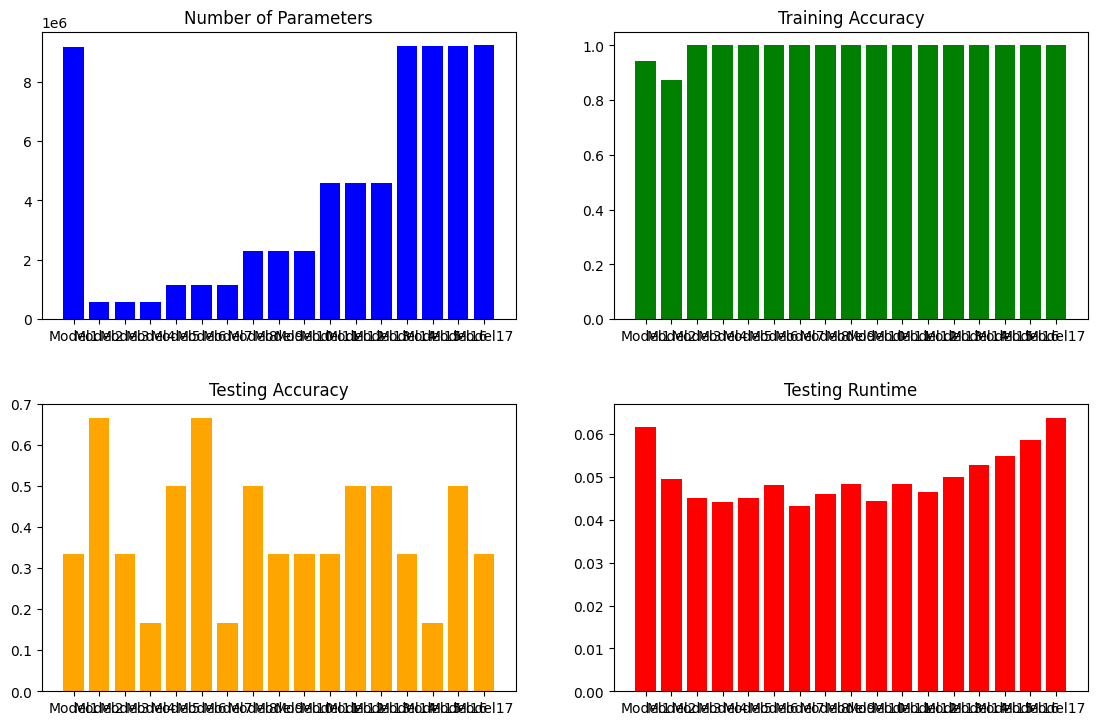

In [38]:
# Calculate the number of parameters for each model
num_params_model1 = model1.count_params()
num_params_model2 = model2.count_params()
num_params_model3 = model3.count_params()
num_params_model4 = model4.count_params()
num_params_model5 = model5.count_params()
num_params_model6 = model6.count_params()
num_params_model7 = model7.count_params()
num_params_model8 = model8.count_params()
num_params_model9 = model9.count_params()
num_params_model10 = model10.count_params()
num_params_model11= model11.count_params()
num_params_model12 = model12.count_params()
num_params_model13= model13.count_params()
num_params_model14 = model14.count_params()
num_params_model15 = model15.count_params()
num_params_model16 = model16.count_params()
num_params_model17 = model17.count_params()


# Calculate running times for testing
start_time = time.time()
model1.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model1 = end_time - start_time

start_time = time.time()
model2.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model2 = end_time - start_time

start_time = time.time()
model3.evaluate(X_test, y_test, verbose=0)
end_time = time.time()
runtime_model3 = end_time - start_time


train_accuracy_model2 = history2.history['accuracy'][-1]
test_accuracy_model2 = model2.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model3 = history3.history['accuracy'][-1]
test_accuracy_model3 = model3.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model4 = history4.history['accuracy'][-1]
test_accuracy_model4 = model4.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model5 = history5.history['accuracy'][-1]
test_accuracy_model5 = model5.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model6 = history6.history['accuracy'][-1]
test_accuracy_model6 = model6.evaluate(X_test, y_test, verbose=0)[1]
train_accuracy_model7 = history7.history['accuracy'][-1]
test_accuracy_model7 = model7.evaluate(X_test, y_test, verbose=0)[1]
train_accuracy_model8 = history8.history['accuracy'][-1]
test_accuracy_model8 = model8.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model9 = history9.history['accuracy'][-1]
test_accuracy_model9 = model9.evaluate(X_test, y_test, verbose=0)[1]
train_accuracy_model10 = history10.history['accuracy'][-1]
test_accuracy_model10 = model10.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model11 = history11.history['accuracy'][-1]
test_accuracy_model11 = model11.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model12 = history12.history['accuracy'][-1]
test_accuracy_model12 = model12.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model13 = history13.history['accuracy'][-1]
test_accuracy_model13 = model13.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model14 = history14.history['accuracy'][-1]
test_accuracy_model14 = model14.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model15 = history15.history['accuracy'][-1]
test_accuracy_model15 = model15.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model16 = history16.history['accuracy'][-1]
test_accuracy_model16 = model16.evaluate(X_test, y_test, verbose=0)[1]

train_accuracy_model17 = history17.history['accuracy'][-1]
test_accuracy_model17 = model17.evaluate(X_test, y_test, verbose=0)[1]

# Data for plotting
models = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7', 'Model8', 'Model9', 'Model10', 'Model11', 'Model12', 'Model13', 'Model14', 'Model15', 'Model16', 'Model17']
num_params = [num_params_model1, num_params_model2, num_params_model3, num_params_model4, num_params_model5, num_params_model6, num_params_model7, num_params_model8, num_params_model9, num_params_model10, num_params_model11, num_params_model12, num_params_model13, num_params_model14, num_params_model15, num_params_model16, num_params_model17]
train_accuracies = [train_accuracy_model1, train_accuracy_model2, train_accuracy_model3, train_accuracy_model4, train_accuracy_model5, train_accuracy_model6, train_accuracy_model7, train_accuracy_model8, train_accuracy_model9, train_accuracy_model10, train_accuracy_model11, train_accuracy_model12, train_accuracy_model13, train_accuracy_model14, train_accuracy_model15, train_accuracy_model16, train_accuracy_model17]
test_accuracies = [test_accuracy_model1, test_accuracy_model2, test_accuracy_model3, test_accuracy_model4, test_accuracy_model5, test_accuracy_model6, test_accuracy_model7, test_accuracy_model8, test_accuracy_model9, test_accuracy_model10, test_accuracy_model11, test_accuracy_model12, test_accuracy_model13, test_accuracy_model14, test_accuracy_model15, test_accuracy_model16, test_accuracy_model17]
runtimes = [runtime_model1, runtime_model2, runtime_model3, runtime_model4, runtime_model5, runtime_model6, runtime_model7, runtime_model8, runtime_model9, runtime_model10, runtime_model11, runtime_model12, runtime_model13, runtime_model14, runtime_model15, runtime_model16, runtime_model17]
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=4.0)

# Bar chart for number of parameters
axs[0, 0].bar(models, num_params, color='blue')
axs[0, 0].set_title('Number of Parameters')

# Bar chart for training accuracy
axs[0, 1].bar(models, train_accuracies, color='green')
axs[0, 1].set_title('Training Accuracy')

# Bar chart for testing accuracy
axs[1, 0].bar(models, test_accuracies, color='orange')
axs[1, 0].set_title('Testing Accuracy')

# Bar chart for runtime
axs[1, 1].bar(models, runtimes, color='red')
axs[1, 1].set_title('Testing Runtime')

# Show the plots
plt.show()